<a href="https://colab.research.google.com/github/BuxinSu/Census_2020_Privacy/blob/main/Numerical/Characteristic_Function_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Compute $\sigma^2$

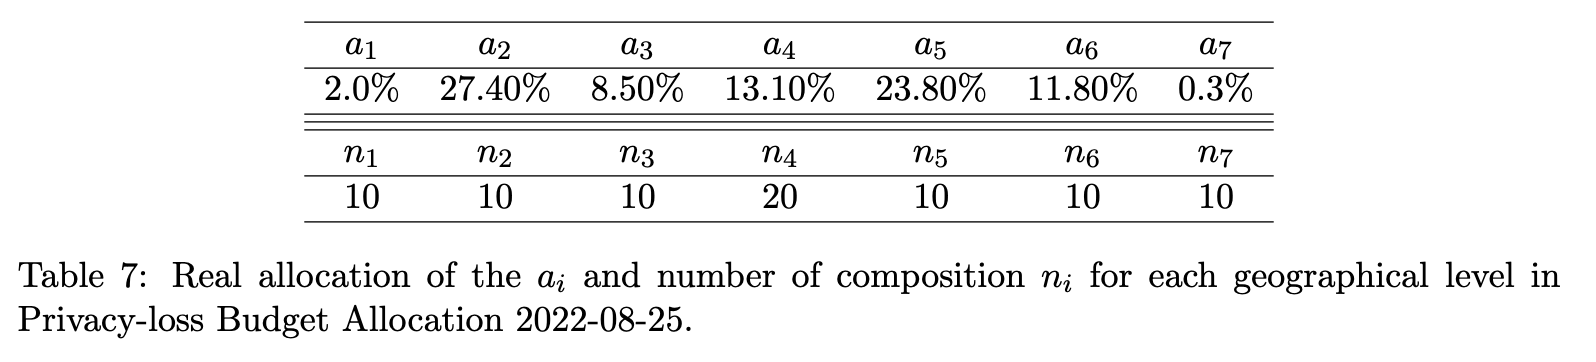

In [ ]:
from mpmath import mp
import pandas as pd

mp.dps = 70

aL_list = [mp.mpf('20'), mp.mpf('274'), mp.mpf('85'),
            mp.mpf('131'), mp.mpf('238'), mp.mpf('118'), mp.mpf('3')]

# Initialize constants as mpf objects
rho_base = mp.mpf('3.65')
hundred = mp.mpf('100')

improvement = mp.mpf('0.9485')

# Define the percentages as mpf objects
percentages = [
    mp.mpf('2'),
    mp.mpf('27.40'),
    mp.mpf('8.5'),
    mp.mpf('13.10'),
    mp.mpf('23.80'),
    mp.mpf('11.80'),
    mp.mpf('0.3')
]

# Calculate rho_list using mpf objects and high-precision arithmetic
rho_list = [rho_base * percentage / hundred for percentage in percentages]

N = mp.mpf('10')

n_list = [
    mp.mpf('10'), mp.mpf('10'), mp.mpf('10'), mp.mpf('20'),
    mp.mpf('10'), mp.mpf('10'), mp.mpf('10')
]

sigma2_list = []
new_sigma2_list = []
for rho in rho_list:
    print(mp.mpf(1 / (2 * rho / N)))
    sigma2_list.append(mp.mpf(1 / (2 * rho / N)))
    new_sigma2_list.append( mp.mpf(1 / (2 * rho / N)) * improvement )

new_sigma2_list

68.49315068493150684931506849315068493150684931506849315068493150684932
4.99950004999500049995000499950004999500049995000499950004999500049995
16.1160354552780016116035455278001611603545527800161160354552780016116
10.4569695702185506640175677088779671651155495137509149848373941231831
5.755726948313572004144123402785771842983768850005755726948313572004144
11.60900859066635709310424889714418388669607615509635477130253076387277
456.6210045662100456621004566210045662100456621004566210045662100456621


[mpf('64.96575342465753424657534246575342465753424657534246575342465753424657598'),
 mpf('4.742025797420257974202579742025797420257974202579742025797420257974202639'),
 mpf('15.28605962933118452860596293311845286059629331184528605962933118452860593'),
 mpf('9.918435637352295304820662971870751856112098713792742863118268325839171734'),
 mpf('5.459307010475423045930701047542304593070104754230459307010475423045930825'),
 mpf('11.01114464824703970280938007894125841653122823310889250058045042953331783'),
 mpf('433.1050228310502283105022831050228310502283105022831050228310502283104926')]

In [ ]:
sigma2_list

[mpf('68.4931506849315068493150684931506849315068493150684931506849315068493152'),
 mpf('4.999500049995000499950004999500049995000499950004999500049995000499950056'),
 mpf('16.11603545527800161160354552780016116035455278001611603545527800161160347'),
 mpf('10.45696957021855066401756770887796716511554951375091498483739412318310152'),
 mpf('5.755726948313572004144123402785771842983768850005755726948313572004144222'),
 mpf('11.6090085906663570931042488971441838866960761550963547713025307638727652'),
 mpf('456.621004566210045662100456621004566210045662100456621004566210045662092')]

# Compute Characteristic Functions

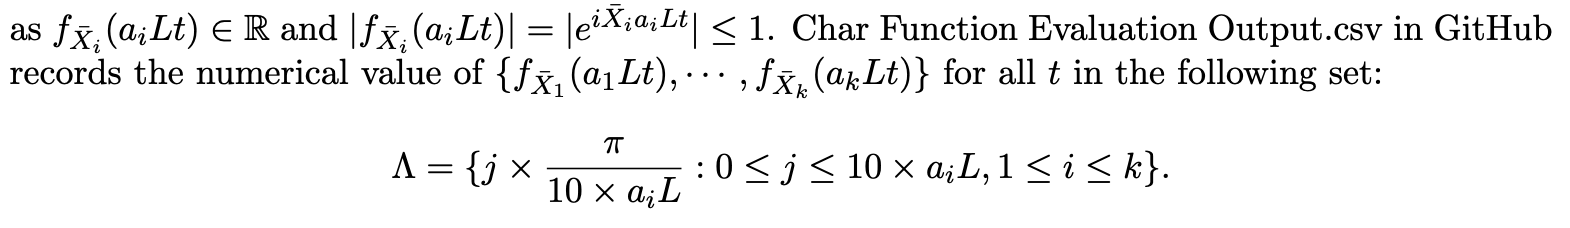

In [ ]:
import mpmath as mp
import pandas as pd
import time

# Set the precision
accuracy = 70
mp.dps = accuracy

# Initialize variables with mp.mpf('') for consistency
eps = mp.mpf('21.97')
rho = mp.mpf('3.65')
n = mp.mpf('10')
L = mp.mpf('1000')
one = mp.mpf('1')
two = mp.mpf('2')
six = mp.mpf('6')
seven = mp.mpf('7')
twenty = mp.mpf('20')

t_eps = n / two * (eps / rho - one)
T_eps = n / two * (eps / rho + one)
k = seven  # number of independent compositions

N = mp.ceil(t_eps * L)
print('Summation Lower Bound:', N)
N_2 = mp.ceil(six * t_eps * L)
print('Summation Upper Bound:', N_2)


def char_func(sigma, aL, n, t):
    # Compute the maximum value of u
    u_max = int(mp.ceil(twenty * mp.sqrt(n * sigma))) + 1
    sum_exp_cos = mp.mpf('0')
    for u in range(1, u_max):
        u_mpf = mp.mpf(u)
        term = mp.exp(-u_mpf ** 2 / (two * n * sigma)) * mp.cos(aL * t * u_mpf)
        sum_exp_cos += term
    factor = one / mp.sqrt(two * mp.pi * n * sigma)
    result = (one + two * sum_exp_cos) * factor
    return result

# Set the range and intervals for calculations
start = mp.mpf('0')
intervals = mp.mpf('200')
end = mp.pi

for i in range(len(sigma2_list)):
    delta_x = end / (intervals * aL_list[i])

    x_values = []
    current_x = start
    while current_x <= end:
        x_values.append(current_x)
        current_x += delta_x
    # Ensure the last value is exactly 'end'
    if x_values[-1] > end:
        x_values[-1] = end
    elif x_values[-1] < end:
        x_values.append(end)

    results = []
    # Iterate and store results
    for x in x_values:
        char_value = char_func(sigma2_list[i], aL_list[i], n_list[i], x)
        # Convert values to strings with high precision
        x_str = mp.nstr(x, n=accuracy)
        char_str = mp.nstr(char_value, n=accuracy)
        temp_results = [x_str, char_str]
        print(temp_results)
        results.append(temp_results)
    # Convert the results list to a DataFrame
    df = pd.DataFrame(results, columns=['x', f'Char_Func_{i+1}'])
    # Format sigma2 value for file name
    sigma2_str = mp.nstr(sigma2_list[i], n=2)
    # Save the DataFrame as a CSV file with dynamic file names
    file_path = f'/content/drive/MyDrive/Research/Discrete Gaussian Mechanism/Results_2024_09_10/Numerical/Characteristic_{i+1}_sigma2_{sigma2_str}.csv'
    df.to_csv(file_path, index=False)


Streaming output truncated to the last 5000 lines.
['2.556138226026746176481342298548009083998052830796643303998342629724399', '0.9443219132775472925384109482741663876794059423825275624706476270230006']
['2.556271344359525405008395800386283639205010337974582927126350042630853', '0.8790633067462623294223029450538645318442105690879343708031152635771154']
['2.556404462692304633535449302224558194411967845152522550254357455537307', '0.7952071401983194723779071745199756094283494840533209014074528950490722']
['2.556537581025083862062502804062832749618925352330462173382364868443761', '0.6990374182109733438503444907710485560285284733643311765239472896742992']
['2.556670699357863090589556305901107304825882859508401796510372281350214', '0.5971461129324665199676860379433138813662388442700670038136133658000493']
['2.556803817690642319116609807739381860032840366686341419638379694256668', '0.4957021810840147453220626242684724126103816946562905541663181749602022']
['2.556936936023421547643663309577656